# Comparing EW and CapWeighted Portfolios

Load the EW and VW versions of the returns of the industry portfolios.

In [1]:
import numpy as np
import pandas as pd

import edhec_risk_kit_203 as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

ind_cw = erk.get_ind_returns(ew=False)
ind_ew = erk.get_ind_returns(ew=True)

In [2]:
sr = pd.DataFrame({"CW": erk.sharpe_ratio(ind_cw["1945":], 0.03, 12), "EW": erk.sharpe_ratio(ind_ew["1945":], 0.03, 12)})

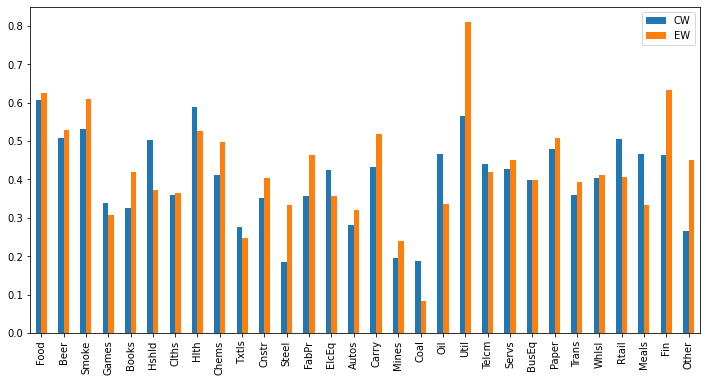

In [3]:
sr.plot.bar(figsize=(12, 6))

In [4]:
(sr["EW"] > sr["CW"]).sum()*100/sr.shape[0]

63.333333333333336

Text(0.5, 1.0, 'Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018')

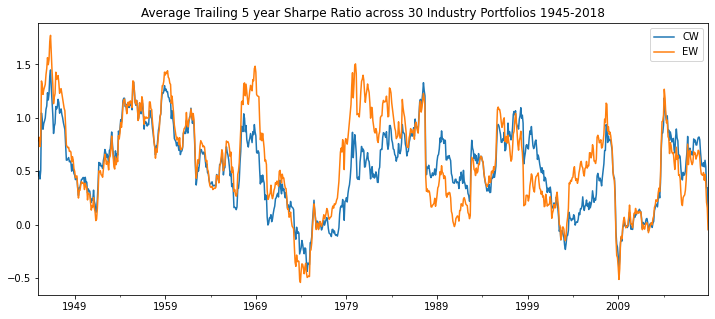

In [5]:
ax = ind_cw.rolling(60).apply(erk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(figsize=(12,5), label="CW", legend=True)
ind_ew.rolling(60).apply(erk.sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(ax=ax, label="EW", legend=True)
ax.set_title("Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018")